# Breast Cancer Classification

# Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Activation

# Loading the Dataset

In [82]:
data=load_breast_cancer()

In [83]:
# These load functions don’t return data in the tabular format. They return a Bunch object. Think of a Bunch object as Scikit-Learn’s fancy name for a dictionary. 

# Information of Dataset

In [84]:
# Let’s begin this dictionary by looking at its keys.

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [85]:
# Description of the dataset

print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Working with the Dataset

In [86]:
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [87]:
print (data.target_names)

['malignant' 'benign']


In [88]:
j = 0
for i in data['feature_names']:
    print(i,":",data['data'][0][j])
    j+=1

mean radius : 17.99
mean texture : 10.38
mean perimeter : 122.8
mean area : 1001.0
mean smoothness : 0.1184
mean compactness : 0.2776
mean concavity : 0.3001
mean concave points : 0.1471
mean symmetry : 0.2419
mean fractal dimension : 0.07871
radius error : 1.095
texture error : 0.9053
perimeter error : 8.589
area error : 153.4
smoothness error : 0.006399
compactness error : 0.04904
concavity error : 0.05373
concave points error : 0.01587
symmetry error : 0.03003
fractal dimension error : 0.006193
worst radius : 25.38
worst texture : 17.33
worst perimeter : 184.6
worst area : 2019.0
worst smoothness : 0.1622
worst compactness : 0.6656
worst concavity : 0.7119
worst concave points : 0.2654
worst symmetry : 0.4601
worst fractal dimension : 0.1189


In [89]:
# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [90]:
B = 0
M = 0
for i in data['target']:
    if i==1:
        B+=1
    else:
        M+=1

In [91]:
print ("Total number of diagnosis:", str(data['data'].shape[0]), "\nBenign:", B, "\nMalignant:",M)

Total number of diagnosis: 569 
Benign: 357 
Malignant: 212


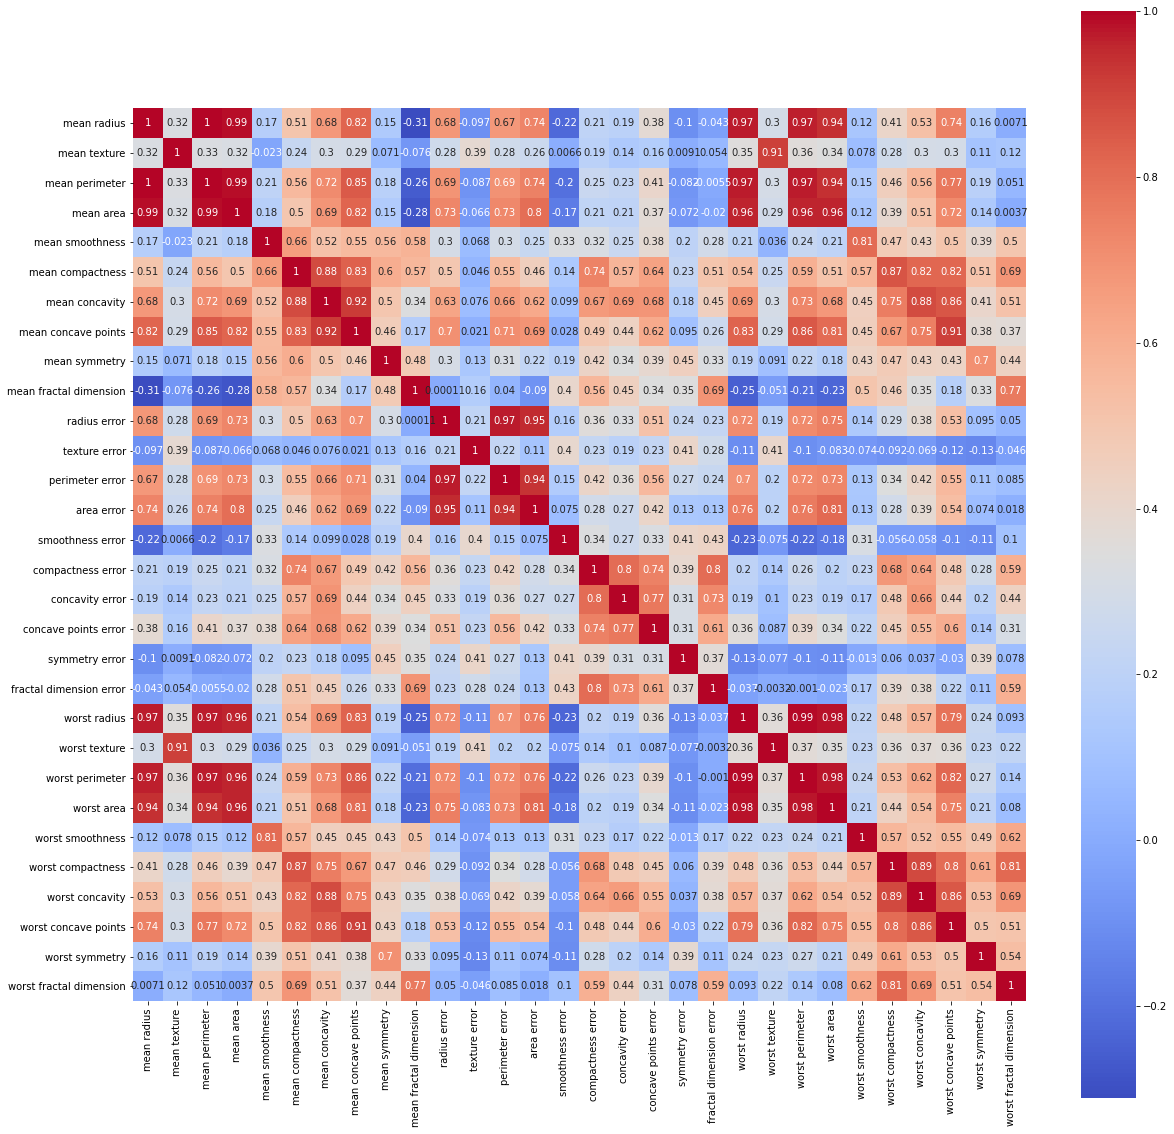

In [92]:
# Finding the correlation between columns using Heatmap

plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

# Seperating the Target from DataFrame

In [93]:
feature = data['data']
label = data['target']

In [94]:
feature.shape

(569, 30)

In [95]:
label.shape

(569,)

In [96]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [97]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Feature Scaling

In [98]:
scaling=StandardScaler()

feature=scaling.fit_transform(feature)

In [99]:
j = 0
for i in data['feature_names']:
    print(i,":",feature[0][j])
    j+=1

mean radius : 1.0970639814699807
mean texture : -2.0733350146975935
mean perimeter : 1.2699336881399383
mean area : 0.9843749048031144
mean smoothness : 1.568466329243428
mean compactness : 3.2835146709868264
mean concavity : 2.652873983743168
mean concave points : 2.532475216403245
mean symmetry : 2.2175150059646405
mean fractal dimension : 2.255746885296269
radius error : 2.4897339267376193
texture error : -0.5652650590684639
perimeter error : 2.833030865855184
area error : 2.4875775569611043
smoothness error : -0.21400164666895383
compactness error : 1.3168615683959484
concavity error : 0.72402615808036
concave points error : 0.6608199414286064
symmetry error : 1.1487566671861758
fractal dimension error : 0.9070830809973359
worst radius : 1.8866896251792757
worst texture : -1.3592934737640827
worst perimeter : 2.3036006236225606
worst area : 2.0012374893299207
worst smoothness : 1.3076862710715387
worst compactness : 2.616665023512603
worst concavity : 2.1095263465722556
worst conca

In [100]:
print(feature[568])
print("-------------------------------------")
print(data['target_names'][label[568]],label[568])

[-1.80840125  1.22179204 -1.81438851 -1.34778924 -3.11208479 -1.15075248
 -1.11487284 -1.26181958 -0.8200699  -0.56103238 -0.07027874  0.3830925
 -0.15744905 -0.46615196  0.04934236 -1.16351619 -1.05750068 -1.91344745
  0.75282996 -0.382754   -1.41089258  0.76418957 -1.43273495 -1.07581292
 -1.85901852 -1.2075525  -1.30583065 -1.74506282 -0.04813821 -0.75120669]
-------------------------------------
benign 1


In [101]:
pd.DataFrame(feature, columns=data['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [102]:
df_frt = pd.DataFrame(feature , columns = data['feature_names'])
df_lbl = pd.DataFrame(label , columns = ['label'])
df = pd.concat([df_frt, df_lbl], axis=1)
df = df.sample(frac = 1)

feature = df.values[ : , : 30]
label = df.values[ : ,30: ]

In [103]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
47,-0.271884,-0.146523,-0.246689,-0.342115,1.383436,0.355511,0.424367,0.631459,1.155090,0.704888,...,0.370108,-0.132881,-0.213029,2.026595,1.032677,1.095810,1.434251,1.616558,1.881599,0
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
348,-0.754709,-0.758542,-0.780514,-0.717252,-0.398546,-0.861932,-0.790076,-0.662883,-0.648476,0.130758,...,-0.795854,-0.821827,-0.711573,0.908780,-0.905004,-0.834570,-0.748025,-0.080494,0.204162,1
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,0.964310,...,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,-1.352369,1.061659,-0.207578,1
273,-1.245485,-0.842317,-1.255026,-1.038066,-0.426301,-1.088781,-0.976392,-0.898898,0.983496,0.045702,...,-0.781198,-1.166747,-0.923578,0.628230,-1.021418,-1.111867,-0.959523,-0.096672,-0.121683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.568798,0.323544,0.664438,0.409297,1.468835,1.854573,1.047093,1.389802,1.286524,1.525681,...,0.944946,0.879838,0.763667,2.039746,1.075298,0.989305,1.411411,1.302709,1.676560,0
444,1.108425,-0.567723,1.051626,0.953090,-0.490350,0.357406,0.253619,0.351336,-0.334494,-0.708463,...,-0.595556,0.775587,0.723235,-0.266022,0.078468,0.752307,0.592220,-0.095054,-0.093975,0
233,1.812780,1.982743,1.747740,1.888800,-0.339479,0.057973,0.836170,0.889399,-1.327551,-0.974973,...,1.905725,1.651291,1.742824,-0.441366,0.138901,0.683223,0.634854,-0.750255,-0.036897,0
267,-0.152598,0.593484,-0.198085,-0.267030,-1.195599,-0.412213,-0.603634,-0.709312,-0.644825,-0.596472,...,0.710451,-0.285980,-0.385129,-1.396988,-0.516959,-0.608750,-0.802689,-0.735695,-0.759519,1


# Splitting the Dataset into Training, Validation and Testing

In [104]:
#500 Training
x_train = feature[:500]
y_train = label[:500]

#35 Validation
x_val = feature[500:535]
y_val = label[500:535]

#34 Testing
x_test = feature[535:]
y_test = label[535:]

# Creating a Sequential Model

In [105]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 30))
# Adding the second hidden layer
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# Output layer => output dimension = 1
model.add(Dense(1, activation = 'sigmoid'))

# Compile and Train Sequential Model

In [106]:
# Compiling the ANN
model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(x_train,y_train, epochs=10, batch_size=5, validation_data=(x_val,y_val))

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 0.2911 - accuracy: 0.8820 - val_loss: 0.0892 - val_accuracy: 0.9429
Epoch 2/10
100/100 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9580 - val_loss: 0.0778 - val_accuracy: 0.9714
Epoch 3/10
100/100 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.1100 - val_accuracy: 0.9714
Epoch 4/10
100/100 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9920 - val_loss: 0.1177 - val_accuracy: 0.9714
Epoch 5/10
100/100 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0774 - val_accuracy: 0.9714
Epoch 6/10
100/100 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9860 - val_loss: 0.1291 - val_accuracy: 0.9714
Epoch 7/10
100/100 [==============================] - 0s 976us/step - loss: 0.0214 - accuracy: 0.9900 - val_loss: 0.1724 - val_accuracy: 0.9714
Epoc

# Evaluate the Model

In [107]:
print("Test Score:", model.evaluate(x_test,y_test))

2/2 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9706
Test Score: [0.1178491935133934, 0.970588207244873]


In [108]:
print("Validation Score:", model.evaluate(x_val,y_val))

2/2 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9714
Validation Score: [0.1804066300392151, 0.9714285731315613]


# Predicting the Target Variable on Test Data using our Sequential Model


In [109]:
for i in range(10):
    sample=x_test[i]
    sample=np.reshape(sample,(1,30))

    if(model.predict(sample)[0][0]>0.5):
        print("Prediction: Bening")
    else:
        print("Prediction: Malignant")

    if(y_test[i]==1):
        print("Actual: Bening")
    else:
        print("Actual: Malignant")
    print("------------")

Prediction: Bening
Actual: Bening
------------
Prediction: Malignant
Actual: Malignant
------------
Prediction: Malignant
Actual: Bening
------------
Prediction: Bening
Actual: Bening
------------
Prediction: Malignant
Actual: Malignant
------------
Prediction: Bening
Actual: Bening
------------
Prediction: Malignant
Actual: Malignant
------------
Prediction: Bening
Actual: Bening
------------
Prediction: Bening
Actual: Bening
------------
Prediction: Malignant
Actual: Malignant
------------
